In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import wave

In [2]:
plt.rcParams['figure.dpi']=300

In [83]:
met_wave = wave.open('100bpm.wav')

In [43]:
met_wave?

Type:        Wave_read
String form: <wave.Wave_read object at 0x12f37e6d0>
File:        ~/mambaforge/envs/science/lib/python3.11/wave.py
Docstring:  
Variables used in this class:

These variables are available to the user though appropriate
methods of this class:
_file -- the open file with methods read(), close(), and seek()
          set through the __init__() method
_nchannels -- the number of audio channels
          available through the getnchannels() method
_nframes -- the number of audio frames
          available through the getnframes() method
_sampwidth -- the number of bytes per audio sample
          available through the getsampwidth() method
_framerate -- the sampling frequency
          available through the getframerate() method
_comptype -- the AIFF-C compression type ('NONE' if AIFF)
          available through the getcomptype() method
_compname -- the human-readable AIFF-C compression type
          available through the getcomptype() method
_soundpos -- the positi

In [84]:
met_buf = met_wave.readframes(met_wave.getnframes())
sample_rate = met_wave.getframerate()
audio_as_np_int = np.frombuffer(met_buf, dtype=np.int16)



In [85]:
sample_rate

96000

In [86]:
audio_as_np_int

array([-540, -540, -998, ...,    0,    0,    0], dtype=int16)

In [87]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the `~numpy.random.Generator.randint`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Outpu

In [88]:
audio_as_np_int=audio_as_np_int+np.random.randint(-10,10,audio_as_np_int.shape)

In [89]:
audio_as_np_int

array([-544, -550, -995, ...,    5,    8,    3])

In [76]:
savgol_filter?

Signature:
savgol_filter(
    x,
    window_length,
    polyorder,
    deriv=0,
    delta=1.0,
    axis=-1,
    mode='interp',
    cval=0.0,
)
Docstring:
Apply a Savitzky-Golay filter to an array.

This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
determines the axis along which the filter is applied.

Parameters
----------
x : array_like
    The data to be filtered. If `x` is not a single or double precision
    floating point array, it will be converted to type ``numpy.float64``
    before filtering.
window_length : int
    The length of the filter window (i.e., the number of coefficients).
    If `mode` is 'interp', `window_length` must be less than or equal
    to the size of `x`.
polyorder : int
    The order of the polynomial used to fit the samples.
    `polyorder` must be less than `window_length`.
deriv : int, optional
    The order of the derivative to compute. This must be a
    nonnegative integer. The default is 0, which means to filter
    the data withou

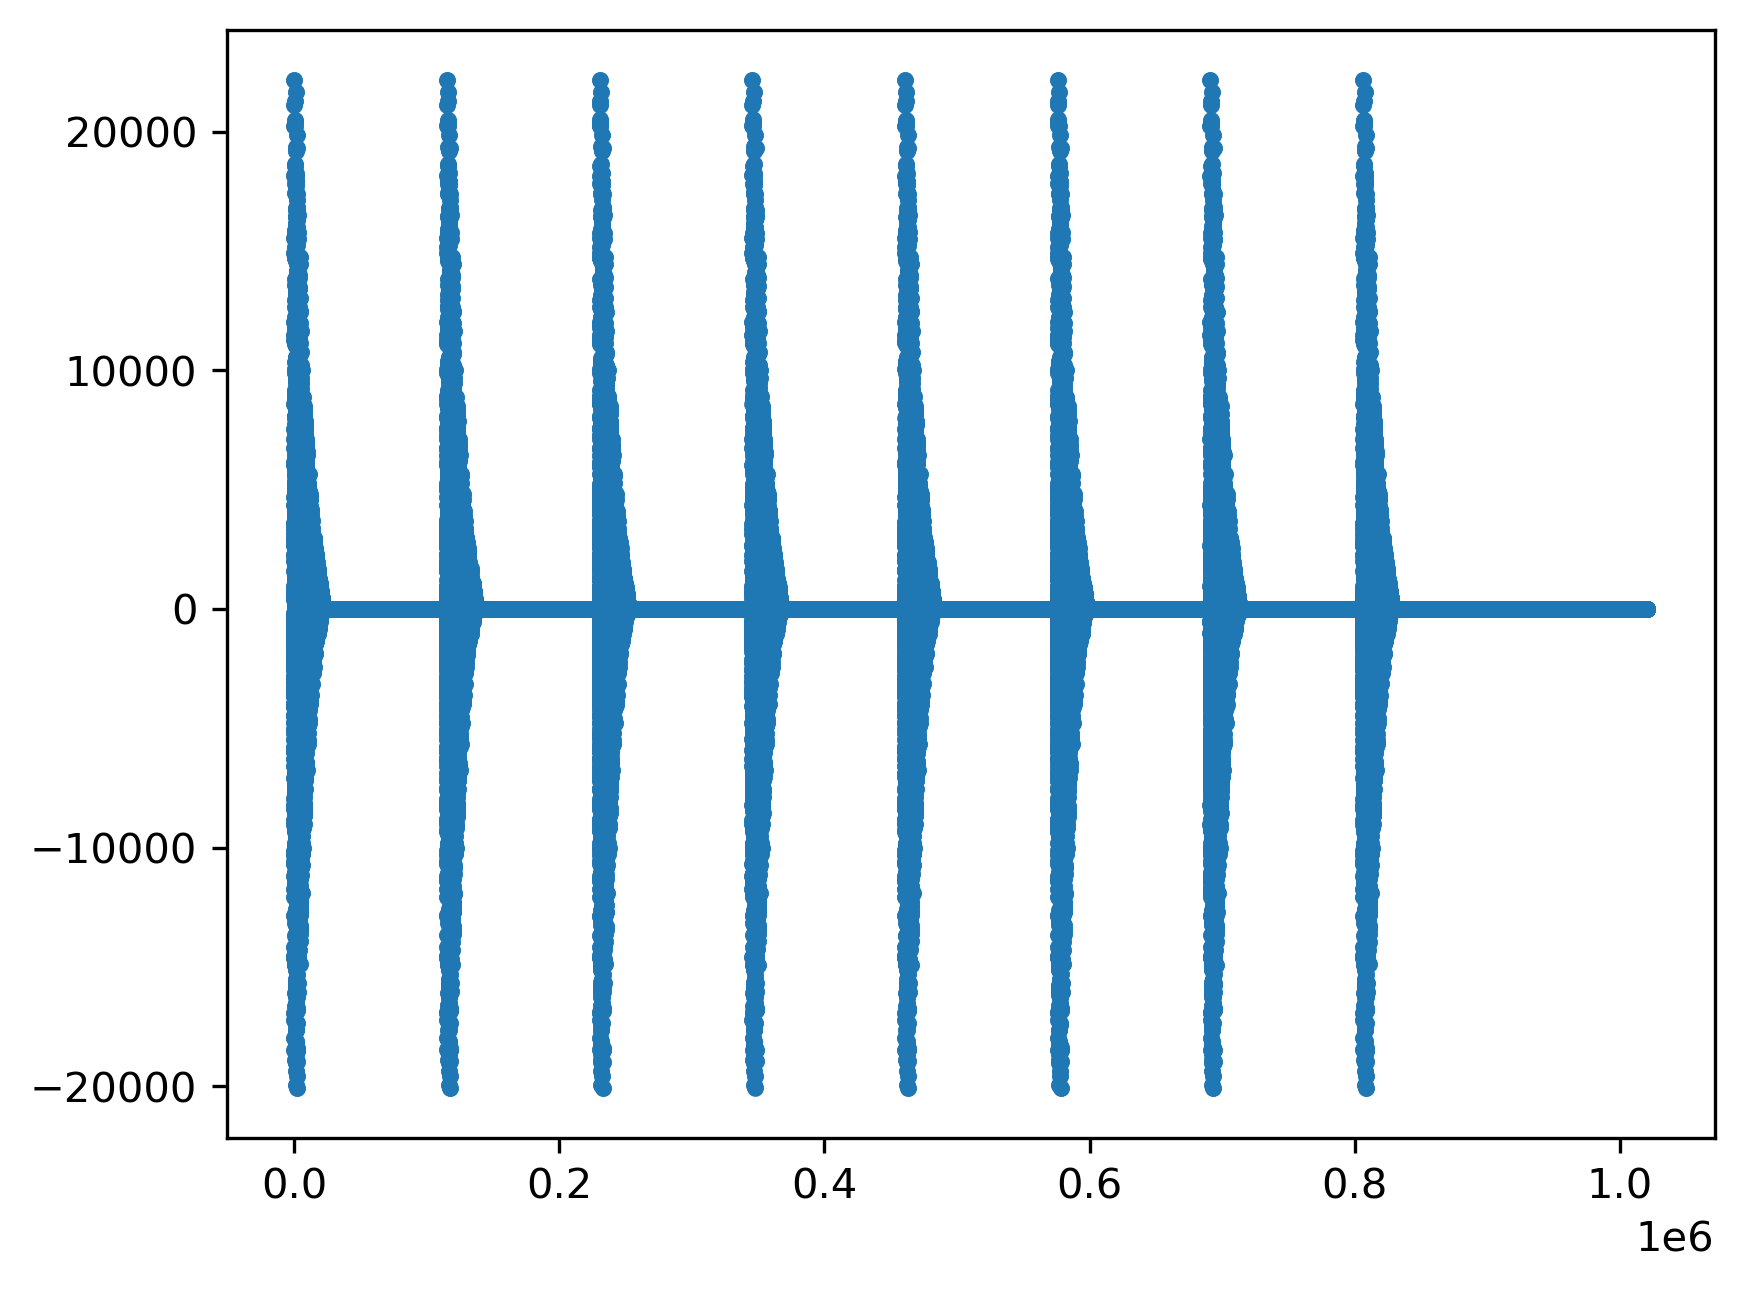

In [90]:
plt.plot(audio_as_np_int, linestyle='None', marker='.')



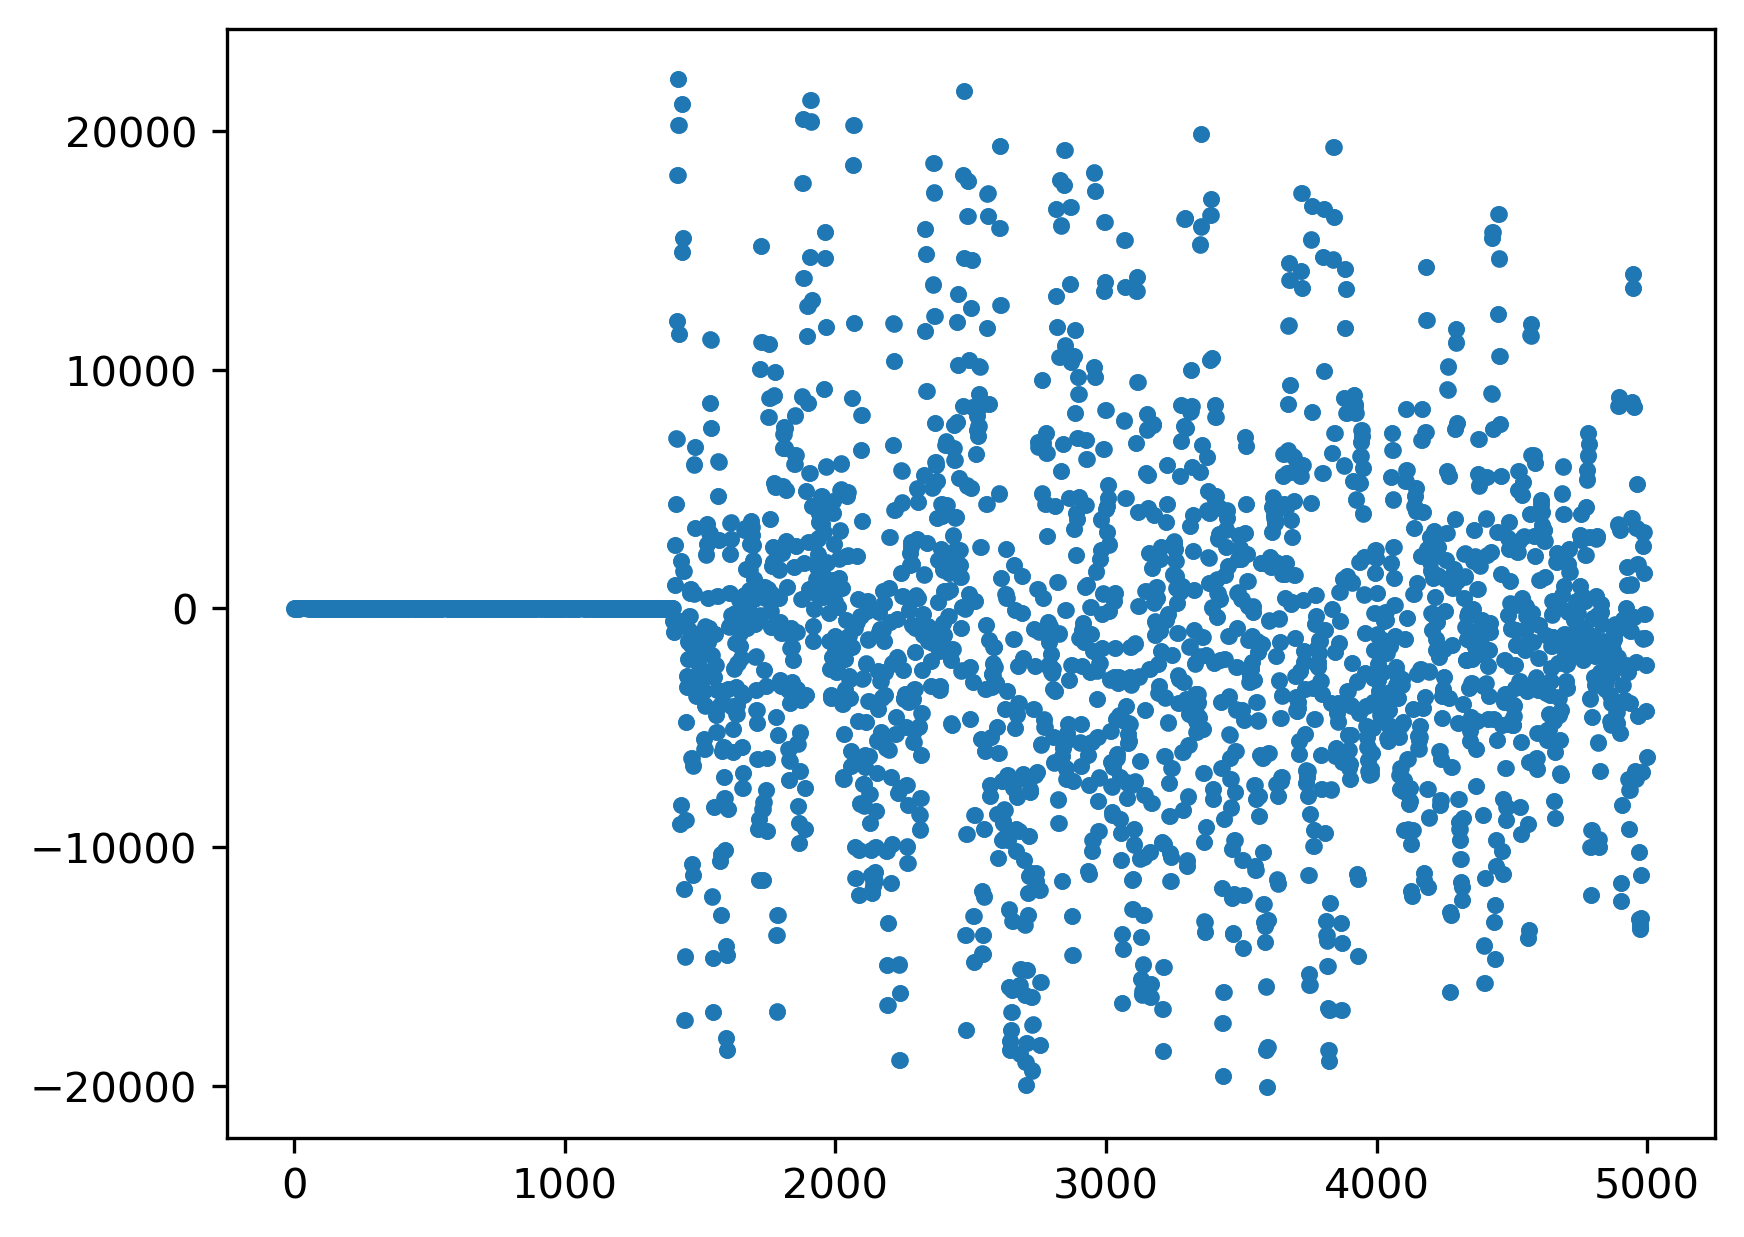

In [44]:
plt.plot(audio_as_np_int[805000:810000], linestyle='None', marker='.')


In [73]:
savgol_filter?

Signature:
savgol_filter(
    x,
    window_length,
    polyorder,
    deriv=0,
    delta=1.0,
    axis=-1,
    mode='interp',
    cval=0.0,
)
Docstring:
Apply a Savitzky-Golay filter to an array.

This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
determines the axis along which the filter is applied.

Parameters
----------
x : array_like
    The data to be filtered. If `x` is not a single or double precision
    floating point array, it will be converted to type ``numpy.float64``
    before filtering.
window_length : int
    The length of the filter window (i.e., the number of coefficients).
    If `mode` is 'interp', `window_length` must be less than or equal
    to the size of `x`.
polyorder : int
    The order of the polynomial used to fit the samples.
    `polyorder` must be less than `window_length`.
deriv : int, optional
    The order of the derivative to compute. This must be a
    nonnegative integer. The default is 0, which means to filter
    the data withou

In [128]:
data= audio_as_np_int
power_db = data**2
smooth_power = np.log10(savgol_filter(power_db, sample_rate*0.01, delta=1/sample_rate, 
                                polyorder=2, deriv=0,mode='constant')[1:-1])
derivative_db = savgol_filter(smooth_power, sample_rate*0.002, delta=1/44100, 
                                polyorder=2, deriv=1,mode='constant')[1:-1]

/var/folders/5s/5m5dcls13_scn11gch5x16680000gn/T/ipykernel_74888/736210624.py:3: RuntimeWarning: invalid value encountered in log10
  smooth_power = np.log10(savgol_filter(power_db, sample_rate*0.01, delta=1/sample_rate,


In [99]:
print(np.isnan(power_db).any())
print(sum(np.isnan(smooth_power)))

False
3112


In [100]:
data

array([-544, -550, -995, ...,    5,    8,    3])

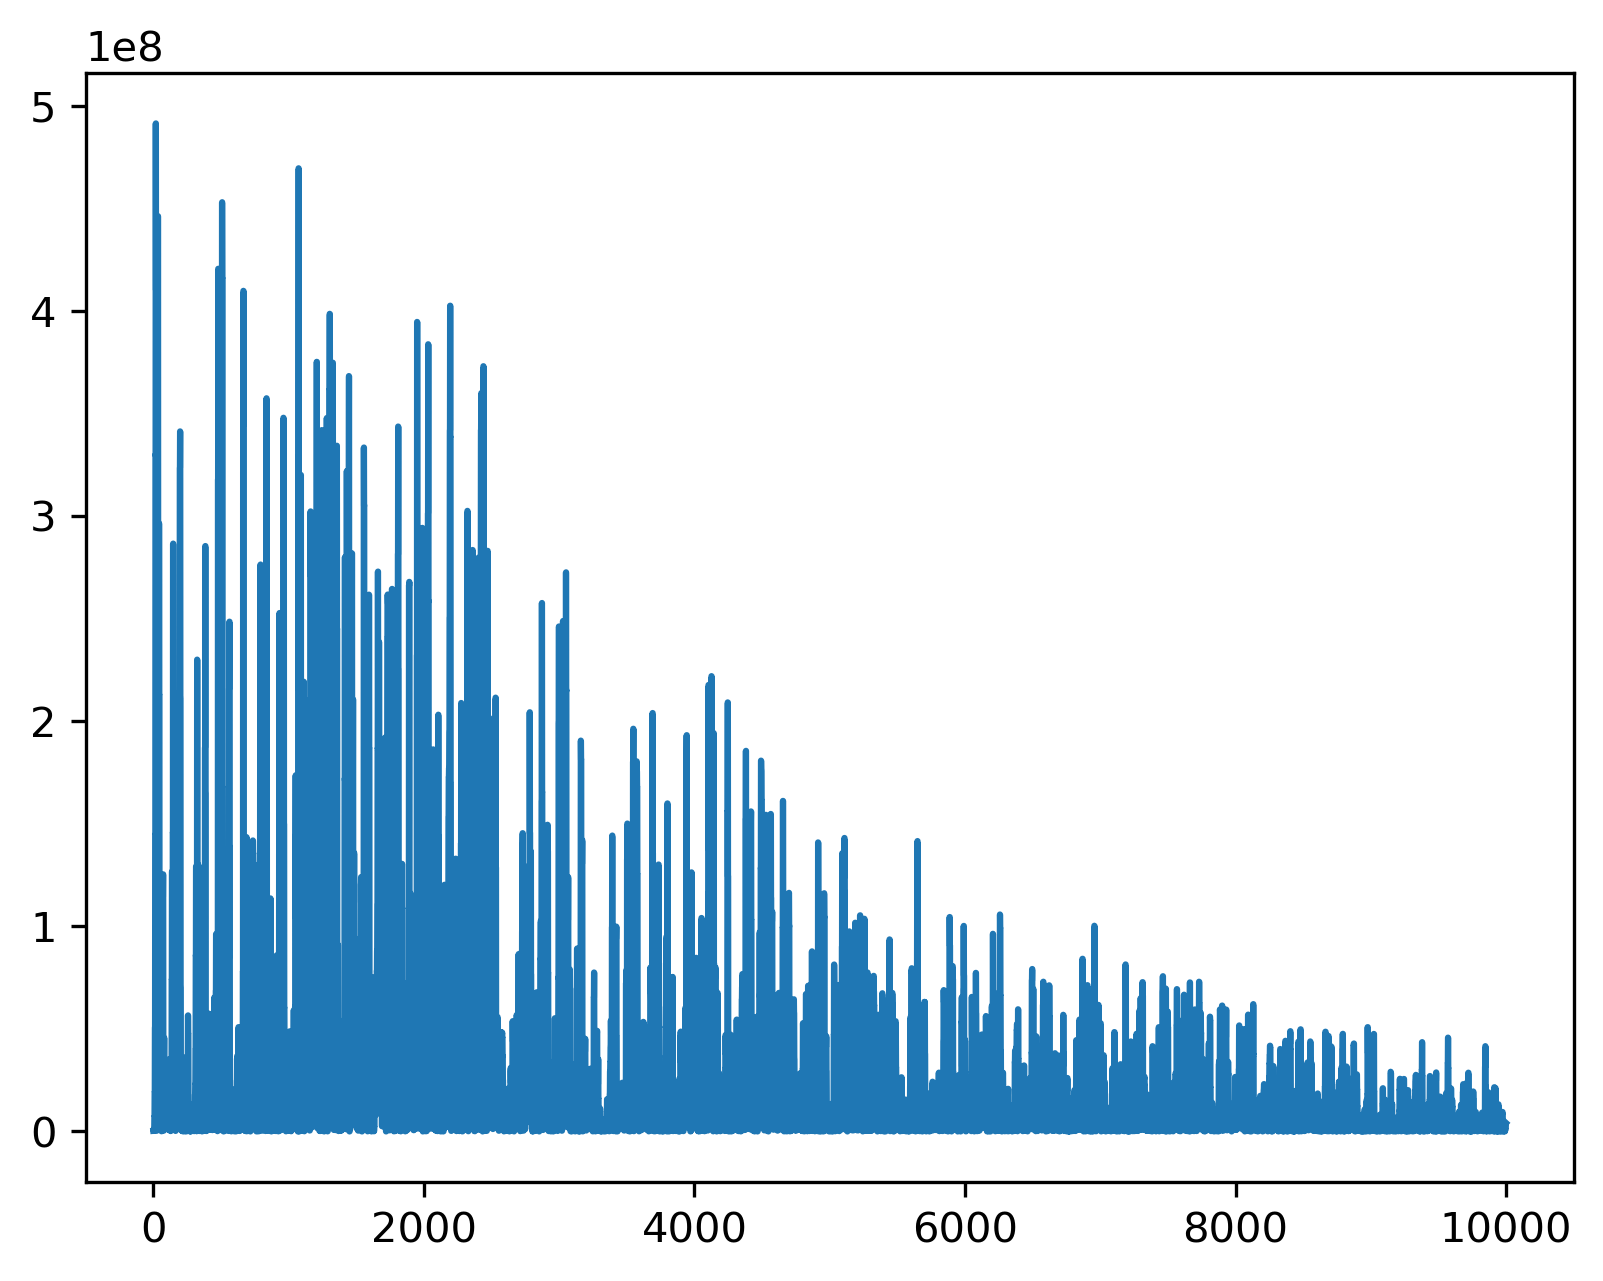

In [116]:
plt.plot(power_db[:10000])

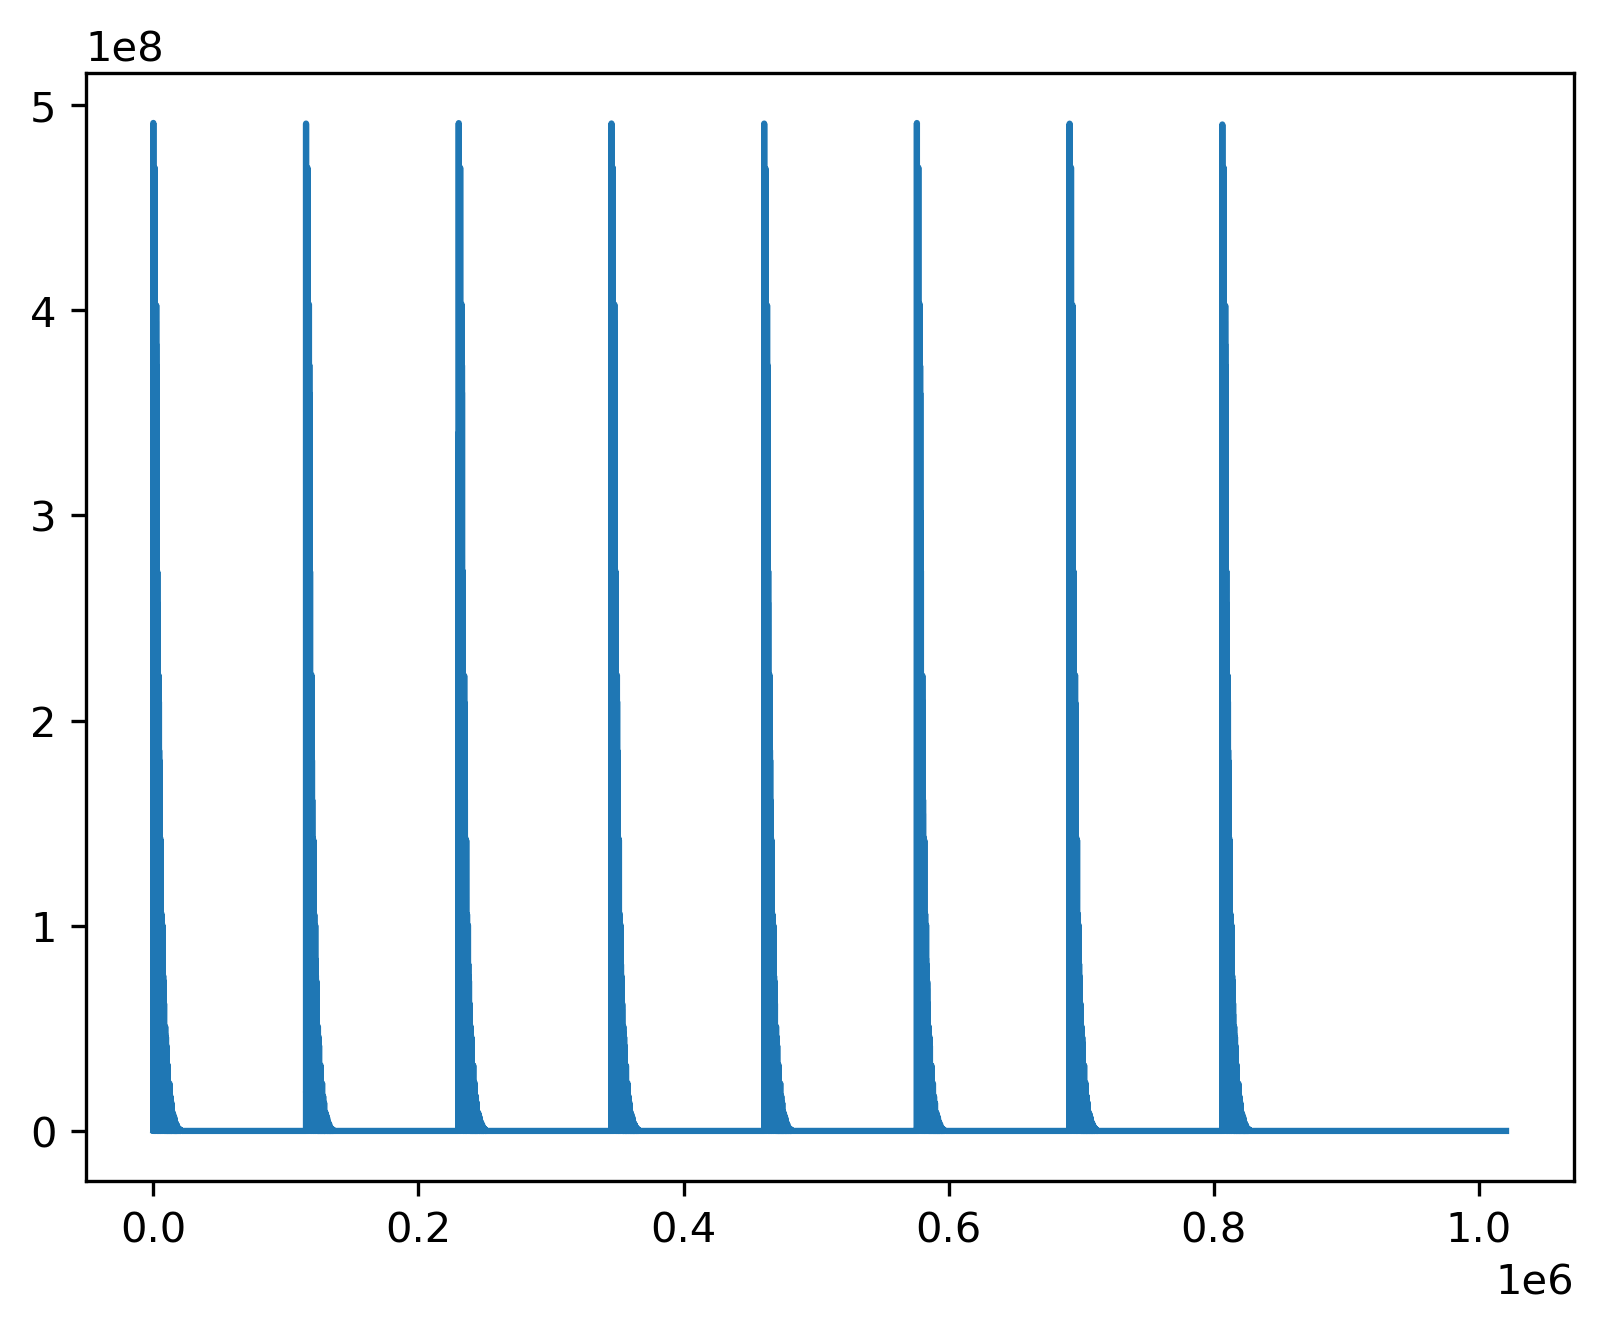

In [117]:
plt.plot(power_db)

In [55]:
len(power_db[power_db==0])

84996

In [30]:
savgol_filter?

Signature:
savgol_filter(
    x,
    window_length,
    polyorder,
    deriv=0,
    delta=1.0,
    axis=-1,
    mode='interp',
    cval=0.0,
)
Docstring:
Apply a Savitzky-Golay filter to an array.

This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
determines the axis along which the filter is applied.

Parameters
----------
x : array_like
    The data to be filtered. If `x` is not a single or double precision
    floating point array, it will be converted to type ``numpy.float64``
    before filtering.
window_length : int
    The length of the filter window (i.e., the number of coefficients).
    If `mode` is 'interp', `window_length` must be less than or equal
    to the size of `x`.
polyorder : int
    The order of the polynomial used to fit the samples.
    `polyorder` must be less than `window_length`.
deriv : int, optional
    The order of the derivative to compute. This must be a
    nonnegative integer. The default is 0, which means to filter
    the data withou

In [52]:
derivative_db

array([119.17282372, 119.18451024, 119.19612352, ...,          nan,
                nan,          nan])

In [62]:
smooth_power

array([3.53039552, 3.56882448, 3.60730689, ...,        nan,        nan,
              nan])

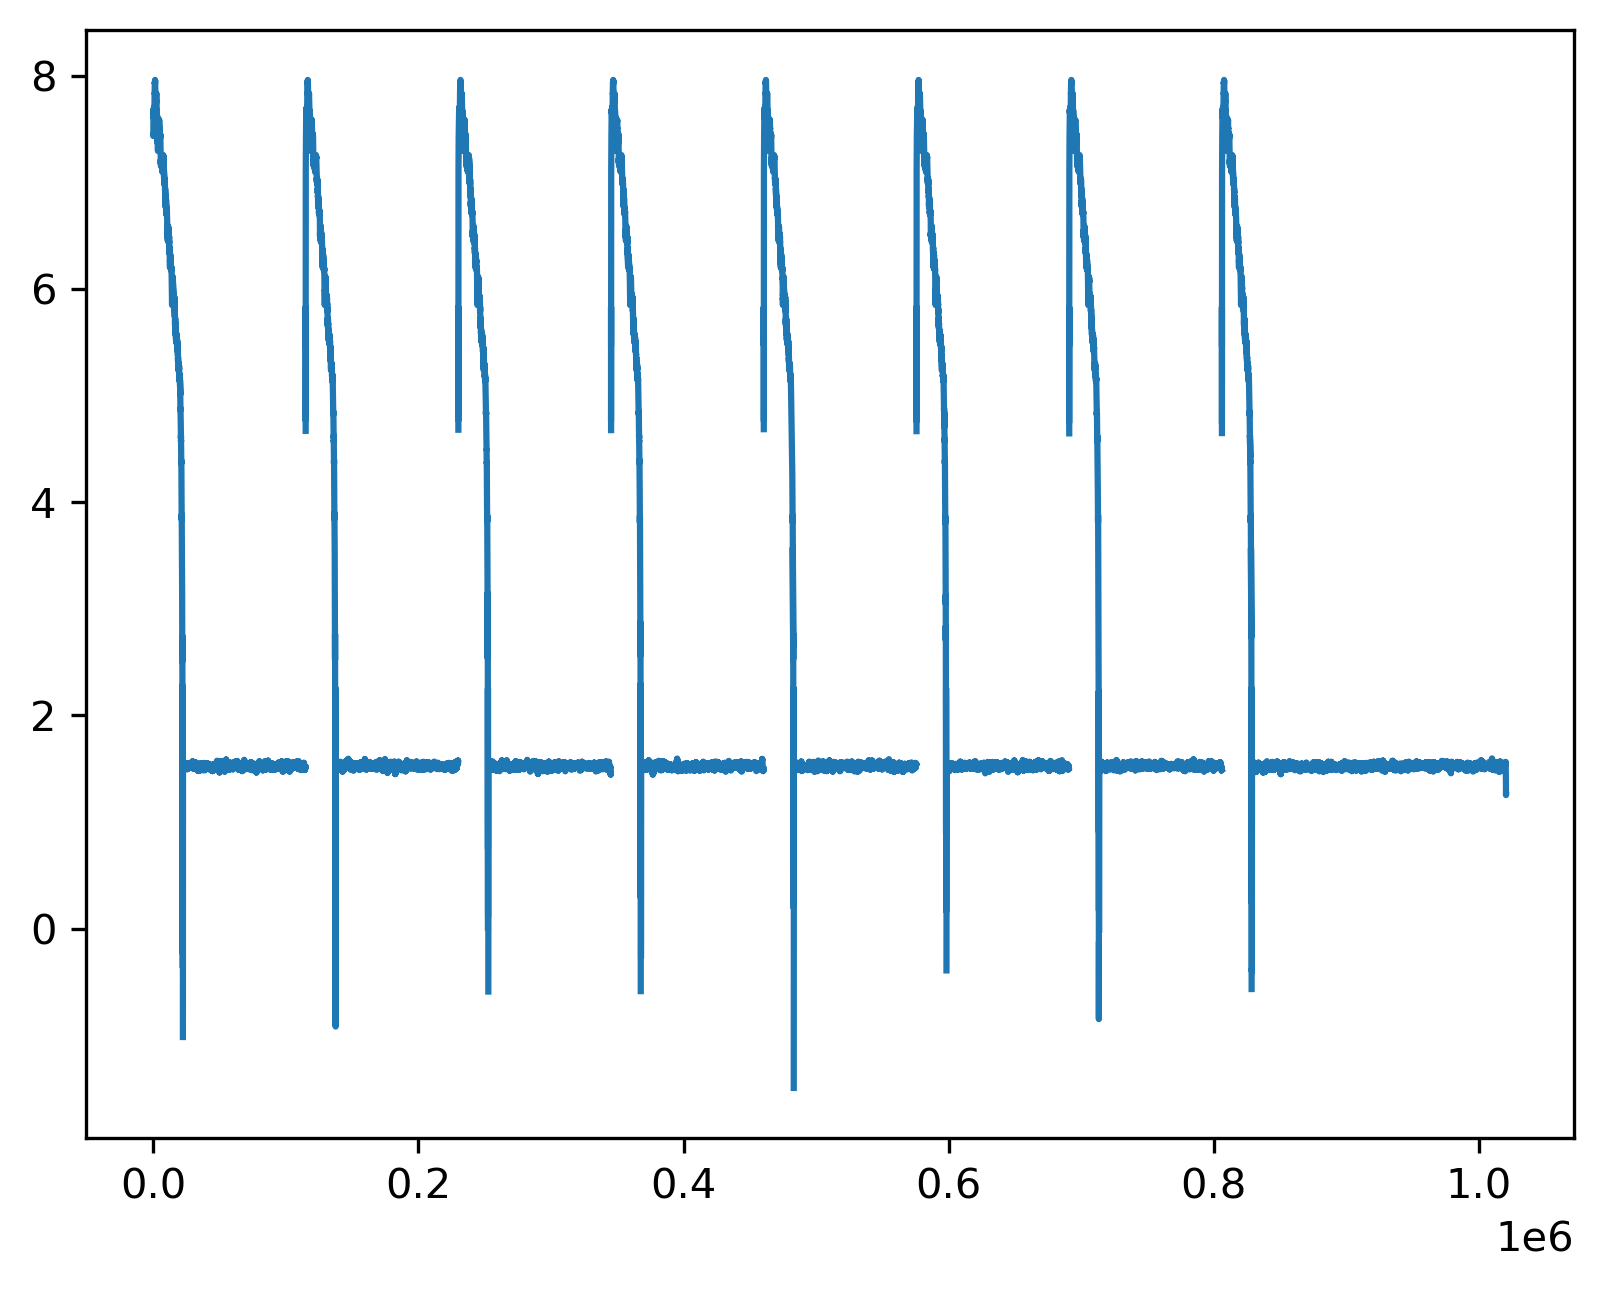

In [122]:
plt.plot(smooth_power)

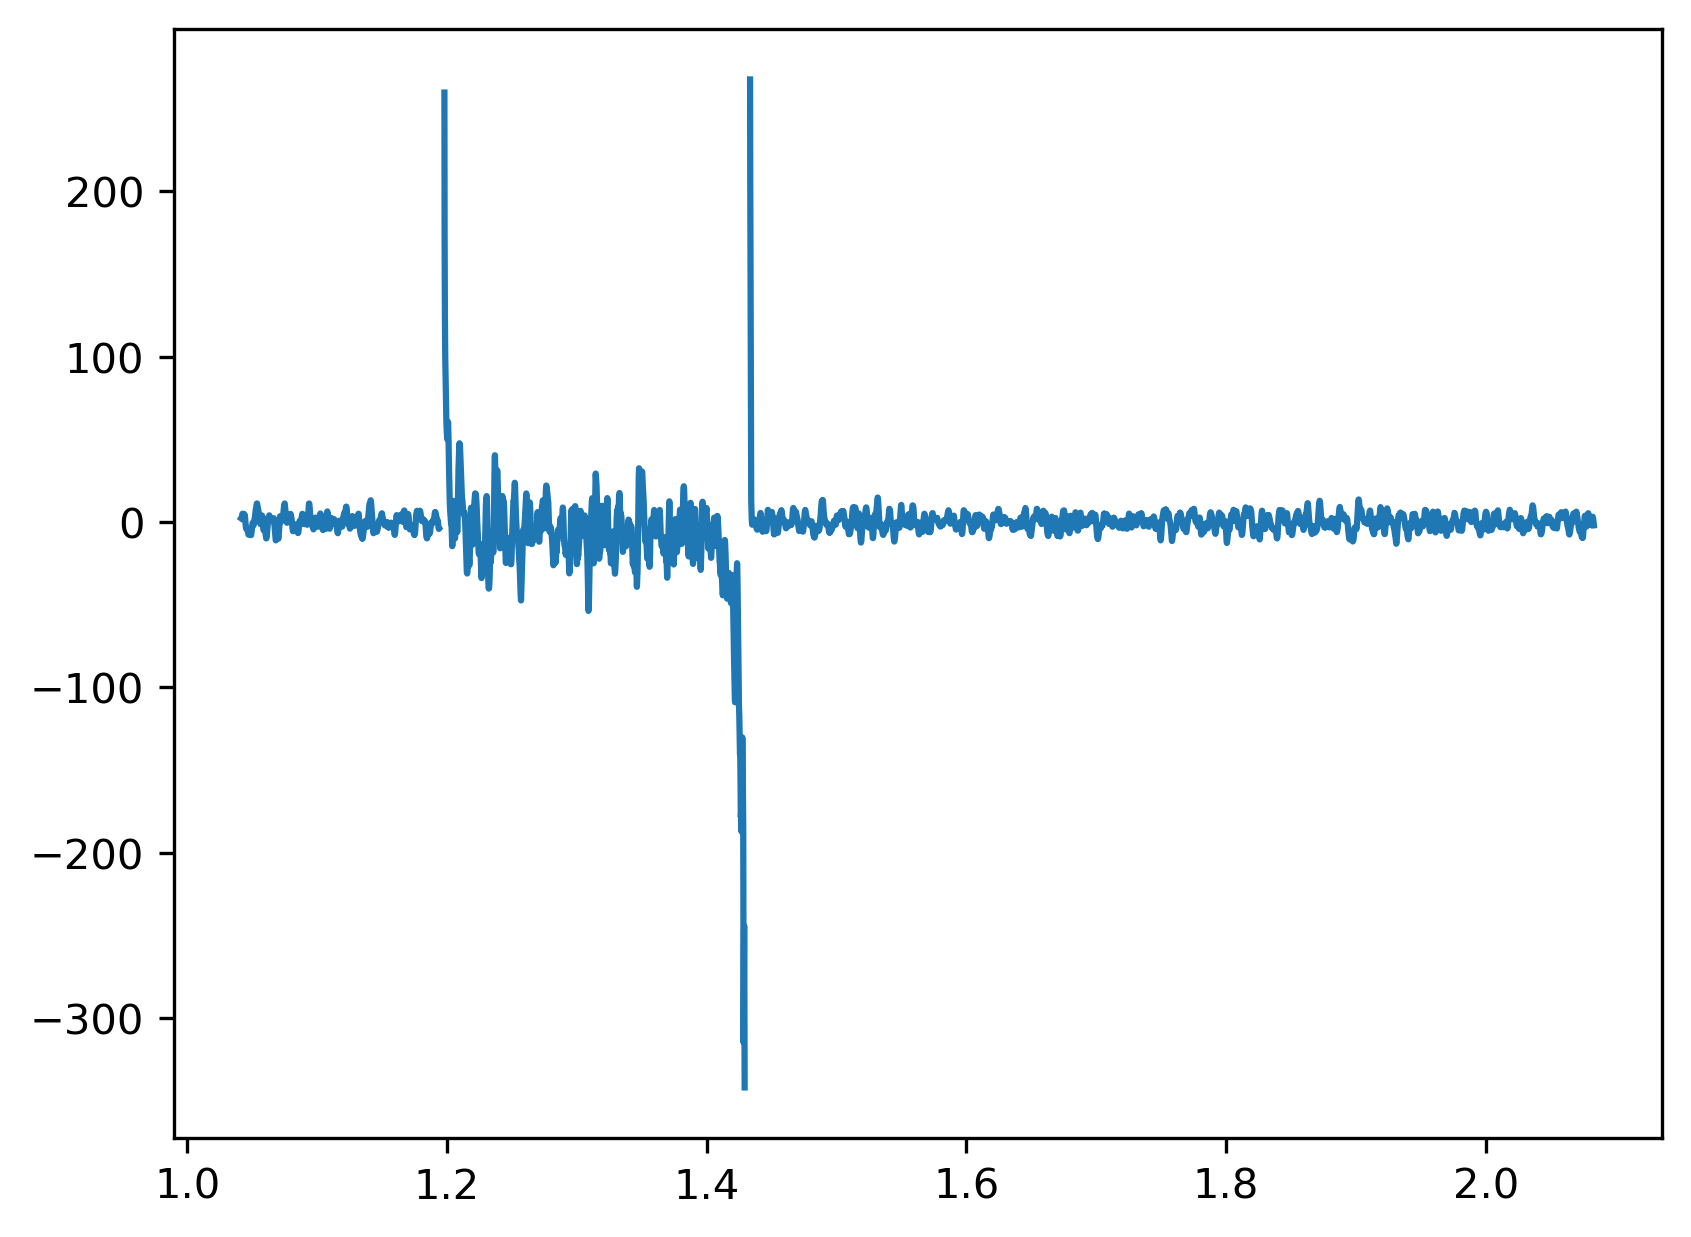

In [136]:
times = np.arange(len(data))/sample_rate
plt.plot(times[100000:200000], derivative_db[100000:200000])


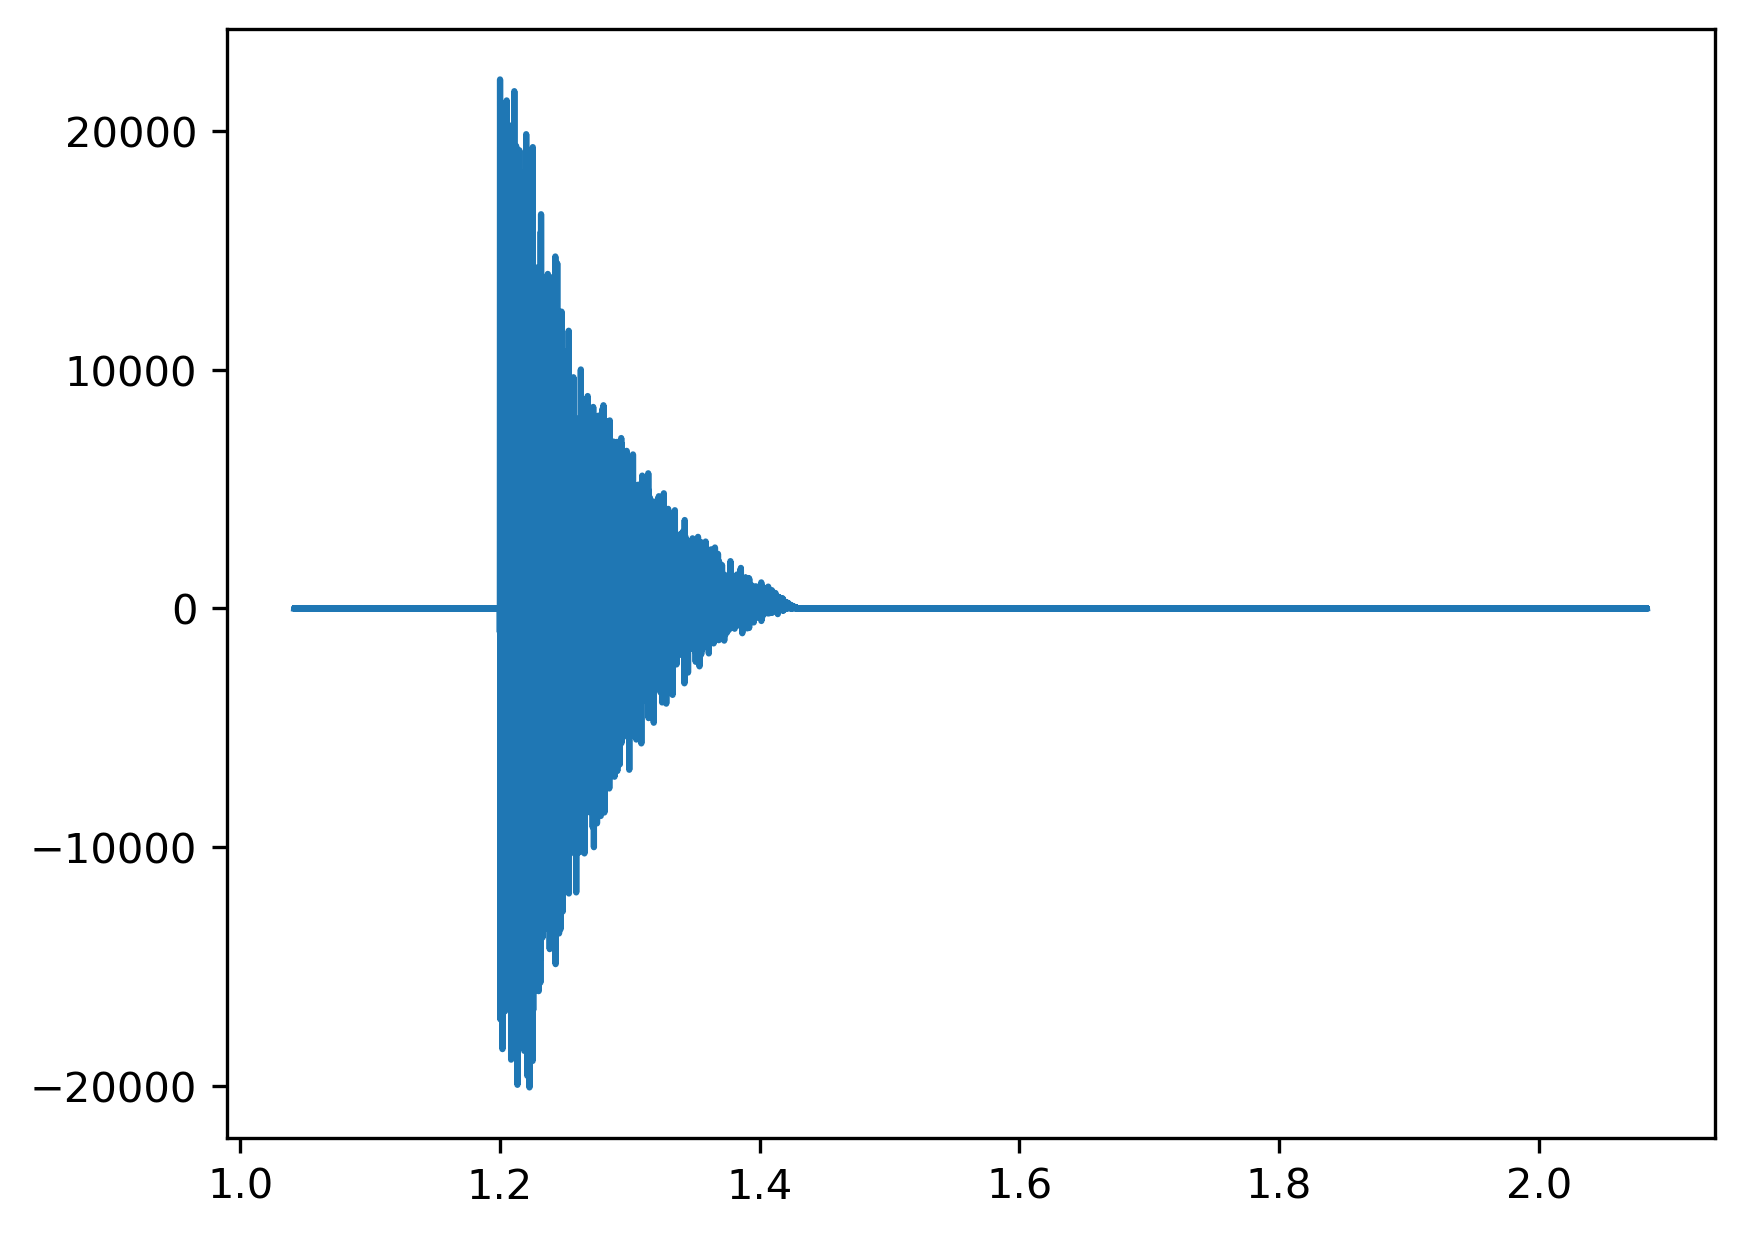

In [137]:
times = np.arange(len(data))/sample_rate
plt.plot(times[100000:200000], data[100000:200000])


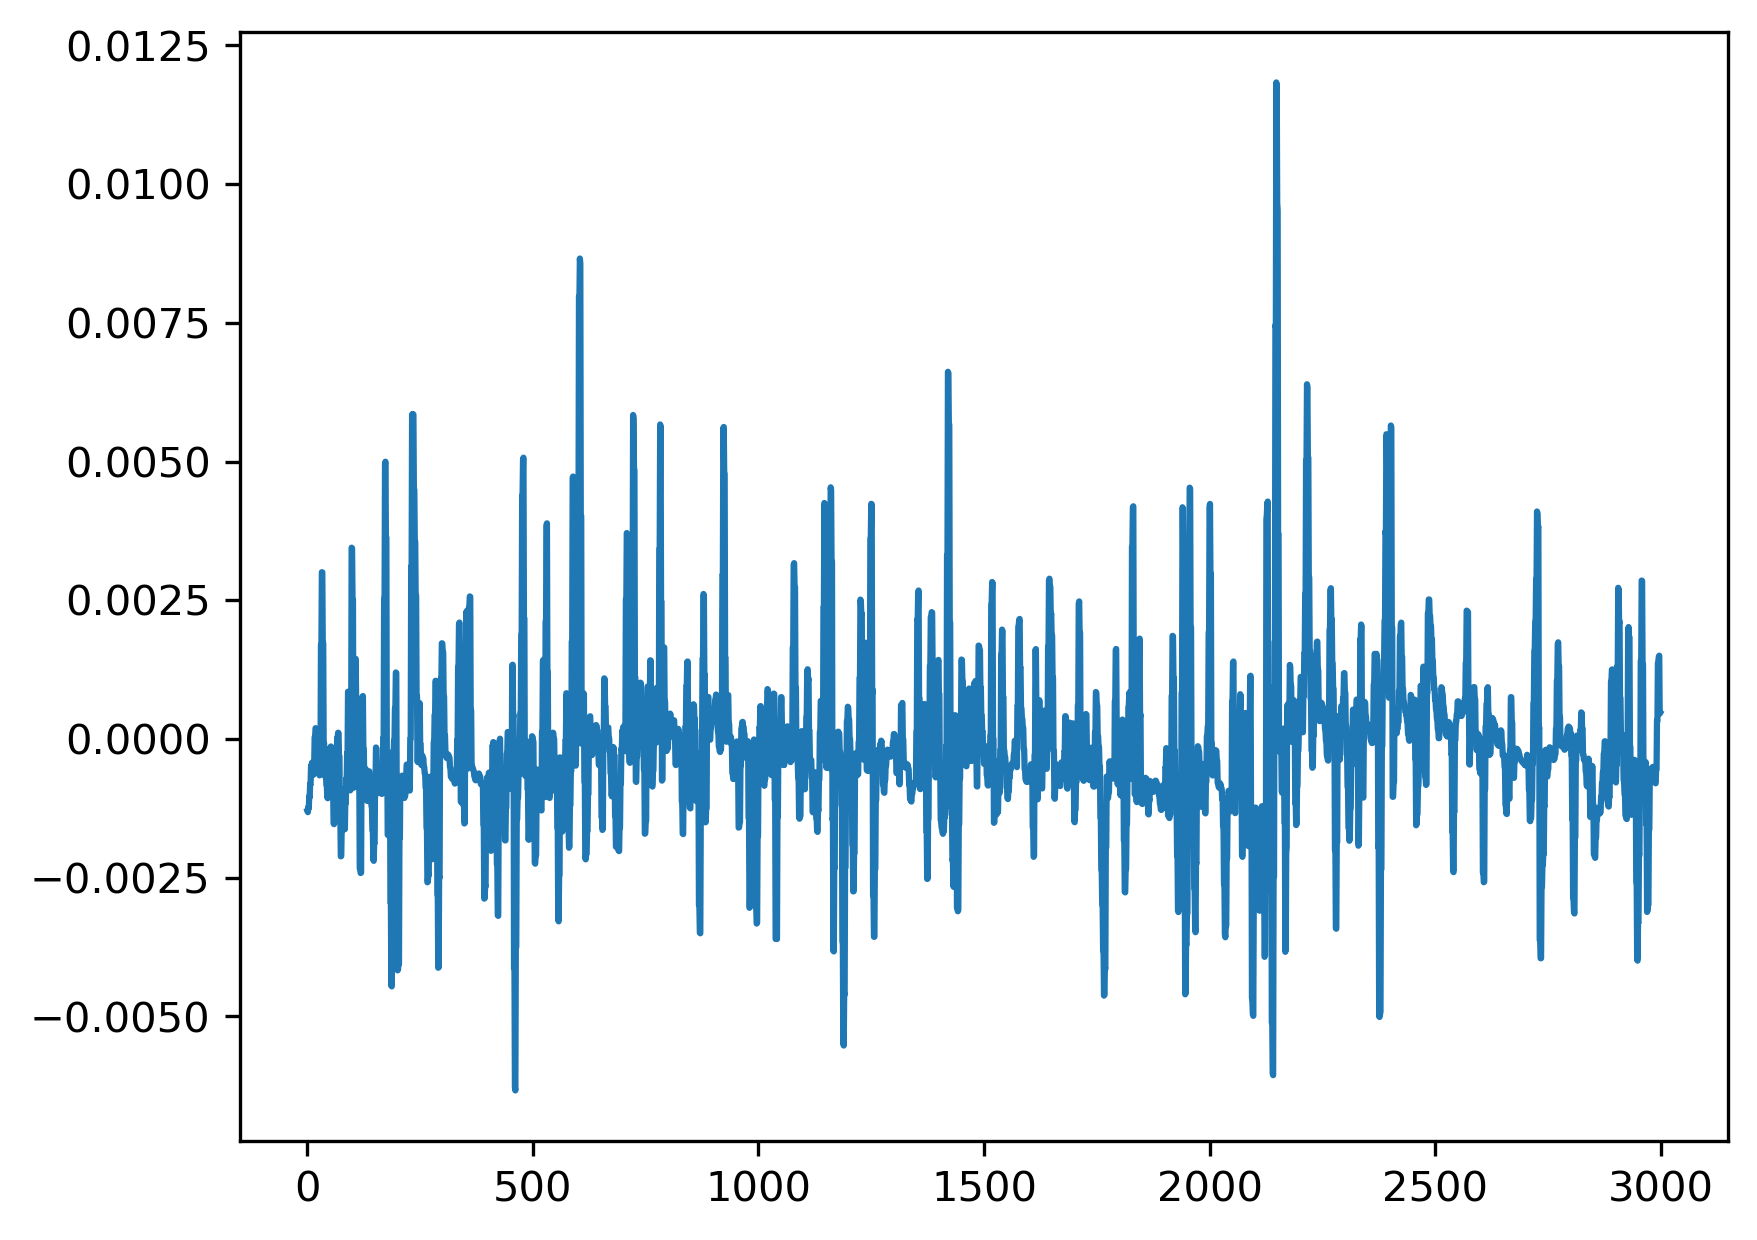

In [123]:
plt.plot(np.diff(smooth_power)[12000:15000])


In [ ]:
def detect_transient(data: np.array, smooth_window=20, ms_samples=44100/1000): 
  power_db = np.log10(data**2)
  derivative_db = savgol_filter(power_db, 1+ 2*smooth_window, delta=1/ms_samples, 
                                polyorder=2, deriv=1,mode='mirror')[1:-1]

In [ ]:
(  )